In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from pandas.api.types import is_string_dtype
#from pandas.api.types import is_numeric_dtype
pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
#pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 250) # to display all the columns
pd.set_option('display.max_rows', 250) # to display all the columns
#np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
warnings.filterwarnings('ignore')

In [2]:
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom_churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
telecom_churn_data.rename(columns={
                                   'jun_vbc_3g':'vbc_3g_6',
                                   'jul_vbc_3g':'vbc_3g_7',
                                   'aug_vbc_3g':'vbc_3g_8',
                                   'sep_vbc_3g':'vbc_3g_9',}, inplace=True)

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

In [7]:
telecom_churn_data[[
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'total_rech_data_6',
'total_rech_data_7',
'total_rech_amt_6',
'total_rech_amt_7'
]] = telecom_churn_data[[
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'total_rech_data_6',
'total_rech_data_7',
'total_rech_amt_6',
'total_rech_amt_7'
]].fillna(0, axis=1)

In [8]:
telecom_churn_data['total_rech_amt_data_6'] = telecom_churn_data['av_rech_amt_data_6'] * telecom_churn_data['total_rech_data_6']
telecom_churn_data['total_rech_amt_data_7'] = telecom_churn_data['av_rech_amt_data_7'] * telecom_churn_data['total_rech_data_7']
telecom_churn_data['total_rech_amt_data_8'] = telecom_churn_data['av_rech_amt_data_8'] * telecom_churn_data['total_rech_data_8']
telecom_churn_data['total_rech_amt_data_9'] = telecom_churn_data['av_rech_amt_data_9'] * telecom_churn_data['total_rech_data_9']

In [9]:
telecom_churn_data_highVal = telecom_churn_data[
                    telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1) 
                  >= telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1).quantile(.70)]

In [10]:
telecom_churn_data_highVal

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
21                0.0            6/30/2014            7/31/2014   
23                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99981             0.0            6/30/2014            7/31/2014   
99984             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
21               8/31/2014            9/30/2014   514.453   597.753   637.760   
23               8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
99981            8/31/2014            9/30/2014   384.316   255.405   393.474   
99984            8/31/2014            9/30/2014   328.594   202.966   118.707   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
7      500.000        57.84        54.68        52.29          NaN   
8      166.787       413.69       351.03        35.08        33.46   
21     578.596       102.41       132.11        85.14       161.63   
23     811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
99981   94.080        78.68        29.04       103.24        34.38   
99984  324.143       423.99       181.83         5.71         5.03   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
7            453.43        567.16        325.91           NaN          16.23   
8             94.66         80.63        136.48        108.71           0.00   
21           757.93        896.68        983.39        869.89           0.00   
23            85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
99981         56.13    

In [11]:
telecom_churn_data_highVal_greater = telecom_churn_data[
                    round(telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1), 2) 
                  > round(telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1).quantile(.70),2)]

In [12]:
telecom_churn_data_highVal_greater

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
21                0.0            6/30/2014            7/31/2014   
23                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99981             0.0            6/30/2014            7/31/2014   
99984             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
21               8/31/2014            9/30/2014   514.453   597.753   637.760   
23               8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
99981            8/31/2014            9/30/2014   384.316   255.405   393.474   
99984            8/31/2014            9/30/2014   328.594   202.966   118.707   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
7      500.000        57.84        54.68        52.29          NaN   
8      166.787       413.69       351.03        35.08        33.46   
21     578.596       102.41       132.11        85.14       161.63   
23     811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
99981   94.080        78.68        29.04       103.24        34.38   
99984  324.143       423.99       181.83         5.71         5.03   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
7            453.43        567.16        325.91           NaN          16.23   
8             94.66         80.63        136.48        108.71           0.00   
21           757.93        896.68        983.39        869.89           0.00   
23            85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
99981         56.13    

In [13]:
round(telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']], 2).mean(axis=1) 

0        279.50
1        153.00
2        120.75
3        135.00
4        150.50
          ...  
99994     42.50
99995     55.00
99996     49.25
99997    801.00
99998    216.00
Length: 99999, dtype: float64

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [14]:
telecom_churn_data_highVal[['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0                0.00            0.00         0.00         0.00
7                0.00            0.00         0.00         0.00
8               34.91          142.18         0.00         0.00
21             252.61         1031.53         0.00         0.00
23             127.48          127.63        13.93       314.74
...               ...             ...          ...          ...
99981          391.63           64.21         0.00         0.00
99984          149.26           14.44       723.41       232.56
99986          547.11         1095.24         9.14       941.48
99988          265.84          182.16         0.05       393.34
99997            2.21            0.00        85.67      4177.14

[30001 rows x 4 columns]

In [15]:
def defineChurn(row):
    if row['total_ic_mou_9'] + row['total_og_mou_9'] + row['vol_2g_mb_9'] + row['vol_3g_mb_9'] > 0.0000 :
        return 0
    else:
        return 1

In [16]:
telecom_churn_data_highVal['churn'] = telecom_churn_data_highVal.apply (lambda row: defineChurn(row), axis=1)

In [17]:
telecom_churn_data_highVal['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

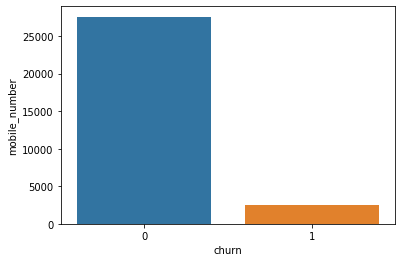

In [18]:
a = telecom_churn_data_highVal.groupby(['churn']).agg({'mobile_number':'count'}).reset_index()
sns.barplot(x=a['churn'], y=a['mobile_number'], data=a)

In [19]:
telecom_churn_data_highVal_greater['churn'] = telecom_churn_data_highVal_greater.apply (lambda row: defineChurn(row), axis=1)

In [20]:
telecom_churn_data_highVal_greater['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [21]:
columns_to_drop = list(filter(lambda x: (x.endswith('_9')), telecom_churn_data_highVal.columns))

In [22]:
telecom_churn_data_highVal_greater=telecom_churn_data_highVal_greater.drop(columns_to_drop, axis=1)

In [23]:
telecom_churn_data_highVal=telecom_churn_data_highVal.drop(columns_to_drop, axis=1)

In [24]:
telecom_churn_data_highVal.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'churn'],
      dtype='object', length=175)

In [25]:
missing_col_per = (round(100 * (telecom_churn_data_highVal.isnull().sum() /  telecom_churn_data_highVal.shape[0]),2))
missing_col_df = pd.DataFrame({'column_name': telecom_churn_data_highVal.columns,'missing_percent':missing_col_per}).reset_index(drop=True)
missing_col_df[missing_col_df['missing_percent'] > 0]

column_name  missing_percent
2              loc_og_t2o_mou             0.75
3              std_og_t2o_mou             0.75
4              loc_ic_t2o_mou             0.75
6        last_date_of_month_7             0.09
7        last_date_of_month_8             0.55
11                onnet_mou_6             1.82
12                onnet_mou_7             1.79
13                onnet_mou_8             3.91
14               offnet_mou_6             1.82
15               offnet_mou_7             1.79
16               offnet_mou_8             3.91
17              roam_ic_mou_6             1.82
18              roam_ic_mou_7             1.79
19              roam_ic_mou_8             3.91
20              roam_og_mou_6             1.82
21              roam_og_mou_7             1.79
22              roam_og_mou_8             3.91
23           loc_og_t2t_mou_6             1.82
24           loc_og_t2t_mou_7             1.79
25           loc_og_t2t_mou_8             3.91
26           loc_og_t2m_mou_6             1.82
27           loc_og_t2m_mou_7             1.79
28           loc_og_t2m_mou_8             3.91
29           loc_og_t2f_mou_6             1.82
30           loc_og_t2f_mou_7             1.79
31           loc_og_t2f_mou_8             3.91
32           loc_og_t2c_mou_6             1.82
33           loc_og_t2c_mou_7             1.79
34           loc_og_t2c_mou_8             3.91
35               loc_og_mou_6             1.82
36               loc_og_mou_7             1.79
37               loc_og_mou_8             3.91
38           std_og_t2t_mou_6             1.82
39           std_og_t2t_mou_7             1.79
40           std_og_t2t_mou_8             3.91
41           std_og_t2m_mou_6             1.82
42           std_og_t2m_mou_7             1.79
43           std_og_t2m_mou_8             3.91
44           std_og_t2f_mou_6             1.82
45           std_og_t2f_mou_7             1.79
46           std_og_t2f_mou_8             3.91
47           std_og_t2c_mou_6             1.82
48           std_og_t2c_mou_7             1.79
49           std_og_t2c_mou_8             3.91
50               std_og_mou_6             1.82
51               std_og_mou_7             1.79
52               std_og_mou_8             3.91
53               isd_og_mou_6             1.82
54               isd_og_mou_7             1.79
55               isd_og_mou_8             3.91
56               spl_og_mou_6             1.82
57               spl_og_mou_7             1.79
58               spl_og_mou_8             3.91
59                og_others_6             1.82
60                og_others_7             1.79
61                og_others_8             3.91
65           loc_ic_t2t_mou_6             1.82
66           loc_ic_t2t_mou_7             1.79
67           loc_ic_t2t_mou_8             3.91
68           loc_ic_t2m_mou_6             1.82
69           loc_ic_t2m_mou_7             1.79
70           loc_ic_t2m_mou_8             3.91
71           loc_ic_t2f_mou_6             1.82
72           loc_ic_t2f_mou_7             1.79
73           loc_ic_t2f_mou_8             3.91
74               loc_ic_mou_6             1.82
75               loc_ic_mou_7             1.79
76               loc_ic_mou_8             3.91
77           std_ic_t2t_mou_6             1.82
78           std_ic_t2t_mou_7             1.79
79           std_ic_t2t_mou_8             3.91
80           std_ic_t2m_mou_6             1.82
81           std_ic_t2m_mou_7             1.79
82           std_ic_t2m_mou_8             3.91
83           std_ic_t2f_mou_6             1.82
84           std_ic_t2f_mou_7             1.79
85           std_ic_t2f_mou_8             3.91
86           std_ic_t2o_mou_6             1.82
87           std_ic_t2o_mou_7             1.79
88           std_ic_t2o_mou_8             3.91
89               std_ic_mou_6             1.82
90               std_ic_mou_7             1.79
91               std_ic_mou_8             3.91
95               spl_ic_mou_6             1.82
96               spl_ic

Fill Missing Values in the below

In [26]:
telecom_churn_data_highVal[['last_date_of_month_7']] = telecom_churn_data_highVal[['last_date_of_month_7']].fillna('7/31/2014', axis=1)
telecom_churn_data_highVal[['last_date_of_month_8']] = telecom_churn_data_highVal[['last_date_of_month_8']].fillna('8/31/2014', axis=1)

In [27]:
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['count_rech_2g_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['count_rech_3g_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['count_rech_2g_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['count_rech_3g_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['count_rech_2g_8'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['count_rech_3g_8'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['av_rech_amt_data_8'].unique())

[nan]
[nan]
[nan]
[nan]
[]
[]
[]


Fill with respect to the total_data_rech values is zero
 - From the above analysis we can directly fill the count of 2g and 3g recharges to zero as we can see whenever the total recharges are zero it has unique value as nan
 - For all the total number of recharges are zero for 8th Month and hence average_rech_amt_data_8 should also be filled with zero

In [28]:
telecom_churn_data_highVal[['count_rech_2g_6']] = telecom_churn_data_highVal[['count_rech_2g_6']].fillna(0, axis=1)
telecom_churn_data_highVal[['count_rech_3g_6']] = telecom_churn_data_highVal[['count_rech_3g_6']].fillna(0, axis=1)
telecom_churn_data_highVal[['count_rech_2g_7']] = telecom_churn_data_highVal[['count_rech_2g_7']].fillna(0, axis=1)
telecom_churn_data_highVal[['count_rech_3g_7']] = telecom_churn_data_highVal[['count_rech_3g_7']].fillna(0, axis=1)
telecom_churn_data_highVal[['count_rech_2g_8']] = telecom_churn_data_highVal[['count_rech_2g_8']].fillna(0, axis=1)
telecom_churn_data_highVal[['count_rech_3g_8']] = telecom_churn_data_highVal[['count_rech_3g_8']].fillna(0, axis=1)
telecom_churn_data_highVal[['av_rech_amt_data_8']] = telecom_churn_data_highVal[['av_rech_amt_data_8']].fillna(0, axis=1)

In [29]:
telecom_churn_data_highVal[['total_rech_data_8']] = telecom_churn_data_highVal['count_rech_2g_8'] + telecom_churn_data_highVal['count_rech_3g_8']

Let's look at filling the missing values for the ARPU of 2g and 3g

In [30]:
def fillMaxRechData(row, columntoCompare, columntoPopulate):
    if row[columntoCompare] == 0:
        row[columntoPopulate] =  0

In [31]:
#telecom_churn_data_highVal[['max_rech_data_8']].unique()
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['max_rech_data_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['max_rech_data_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['max_rech_data_8'].unique())

[nan]
[nan]
[nan]


In [32]:
telecom_churn_data_highVal[['max_rech_data_6']] = telecom_churn_data_highVal[['max_rech_data_6']].fillna(0, axis=1)
telecom_churn_data_highVal[['max_rech_data_7']] = telecom_churn_data_highVal[['max_rech_data_7']].fillna(0, axis=1)
telecom_churn_data_highVal[['max_rech_data_8']] = telecom_churn_data_highVal[['max_rech_data_8']].fillna(0, axis=1)

In [33]:
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['date_of_last_rech_data_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['date_of_last_rech_data_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['date_of_last_rech_data_8'].unique())

[nan]
[nan]
[nan]


In [34]:
telecom_churn_data_highVal.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.000100e+04    30001.0         29777.0         29777.0   
mean    7.001206e+09      109.0             0.0             0.0   
std     6.908784e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000609e+09      109.0             0.0             0.0   
50%     7.001203e+09      109.0             0.0             0.0   
75%     7.001804e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29777.0  30001.000000  30001.000000  30001.000000  29456.000000   
mean              0.0    558.490824    560.782203    508.597957    265.618262   
std               0.0    460.640461    479.776947    501.961981    462.493645   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    309.865000    309.826000    231.473000     19.240000   
50%               0.0    481.694000    480.943000    427.585000     88.060000   
75%               0.0    699.943000    698.315000    661.491000    297.415000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   
mean     272.700470    243.646938    380.608111    384.994337    348.723294   
std      482.972367    465.200856    484.257474    500.807874    486.918550   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.155000     14.255000     78.575000     76.040000     58.670000   
50%       86.885000     72.930000    229.635000    227.120000    197.590000   
75%      298.087500    255.025000    494.780000    500.365000    455.385000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29456.000000   29464.000000   28827.000000   29456.000000   
mean       16.408431      12.872921      13.009645      27.063178   
std        76.973057      76.454034      75.575865     117.218920   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29464.000000   28827.000000      29456.000000      29464.000000   
mean       20.519370      20.674656         86.047905         87.235755   
std        96.933381     106.751862        230.609510        242.427257   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.030000          5.280000   
50%         0.000000       0.000000         25.580000         25.780000   
75%         0.000000       0.000000         79.765000         80.282500   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28827.000000      29456.000000      29464.000000      28827.000000   
mean          81.256858        166.263652        165.980922        157.937216   
std          231.399901        251.423301        242.754684        236.315181   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.830000         21.137500         22.910000         17.530000   
50%           23.240000         80.240000         81.685000         74.540000   
75%           76.040000        212.417500        211.745000        205.860000   
max        1075

Drop t2o_mou values with zero as all the values in the dataset are zero
Similarly we can drop these std_og_t2c_mou_6	std_og_t2c_mou_7	std_og_t2c_mou_8

In [35]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'], axis=1)

In [36]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [37]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(['total_rech_amt_data_8'], axis=1)

In [38]:
print(telecom_churn_data_highVal[(telecom_churn_data_highVal['total_rech_data_8'] == 0) & (telecom_churn_data_highVal['total_rech_num_8'] == 0)]['night_pck_user_8'].unique())
print(telecom_churn_data_highVal[(telecom_churn_data_highVal['total_rech_data_7'] == 0) & (telecom_churn_data_highVal['total_rech_num_7'] == 0)]['night_pck_user_7'].unique())
print(telecom_churn_data_highVal[(telecom_churn_data_highVal['total_rech_data_6'] == 0) & (telecom_churn_data_highVal['total_rech_num_6'] == 0)]['night_pck_user_6'].unique())

print(telecom_churn_data_highVal[(telecom_churn_data_highVal['total_rech_data_8'] == 0) & (telecom_churn_data_highVal['total_rech_num_8'] == 0)]['fb_user_8'].unique())
print(telecom_churn_data_highVal[(telecom_churn_data_highVal['total_rech_data_7'] == 0) & (telecom_churn_data_highVal['total_rech_num_7'] == 0)]['fb_user_7'].unique())
print(telecom_churn_data_highVal[(telecom_churn_data_highVal['total_rech_data_6'] == 0) & (telecom_churn_data_highVal['total_rech_num_6'] == 0)]['fb_user_6'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


From the Above we can say that all the night pack and fb users are nan if the total_ rechargers are zero, hence fill it with Zero

In [39]:
telecom_churn_data_highVal[['night_pck_user_6']] = telecom_churn_data_highVal[['night_pck_user_6']].fillna(0, axis=1)
telecom_churn_data_highVal[['night_pck_user_7']] = telecom_churn_data_highVal[['night_pck_user_7']].fillna(0, axis=1)
telecom_churn_data_highVal[['night_pck_user_8']] = telecom_churn_data_highVal[['night_pck_user_8']].fillna(0, axis=1)

In [40]:
telecom_churn_data_highVal[['fb_user_6']] = telecom_churn_data_highVal[['fb_user_6']].fillna(0, axis=1)
telecom_churn_data_highVal[['fb_user_7']] = telecom_churn_data_highVal[['fb_user_7']].fillna(0, axis=1)
telecom_churn_data_highVal[['fb_user_8']] = telecom_churn_data_highVal[['fb_user_8']].fillna(0, axis=1)

In [41]:
telecom_churn_data_highVal['date_of_last_rech_data_6'].unique()

array(['6/21/2014', nan, '6/30/2014', '6/29/2014', '6/17/2014',
       '6/11/2014', '6/25/2014', '6/10/2014', '6/20/2014', '6/27/2014',
       '6/12/2014', '6/13/2014', '6/26/2014', '6/16/2014', '6/14/2014',
       '6/24/2014', '6/28/2014', '6/4/2014', '6/2/2014', '6/15/2014',
       '6/9/2014', '6/22/2014', '6/6/2014', '6/19/2014', '6/23/2014',
       '6/8/2014', '6/7/2014', '6/18/2014', '6/3/2014', '6/5/2014',
       '6/1/2014'], dtype=object)

In [42]:
telecom_churn_data_highVal[telecom_churn_data_highVal['onnet_mou_8'].isnull()][['mobile_number','loc_og_t2t_mou_8',
'std_og_t2t_mou_8',
'loc_ic_t2t_mou_8',
'std_ic_t2t_mou_8','onnet_mou_8']].head()

mobile_number  loc_og_t2t_mou_8  std_og_t2t_mou_8  loc_ic_t2t_mou_8  \
111     7001300706               NaN               NaN               NaN   
188     7000340381               NaN               NaN               NaN   
358     7002255278               NaN               NaN               NaN   
527     7000142585               NaN               NaN               NaN   
539     7000670087               NaN               NaN               NaN   

     std_ic_t2t_mou_8  onnet_mou_8  
111               NaN          NaN  
188               NaN          NaN  
358               NaN          NaN  
527               NaN          NaN  
539               NaN          NaN

In [43]:
telecom_churn_data_highVal['onnet_mou_8'].fillna((telecom_churn_data_highVal['loc_og_t2t_mou_8'] + telecom_churn_data_highVal['std_og_t2t_mou_8']), inplace=True)

In [44]:
telecom_churn_data_highVal[['onnet_mou_8']]

onnet_mou_8
0             0.00
7            52.29
8            35.08
21           85.14
23           33.58
...            ...
99981       103.24
99984         5.71
99986       775.41
99988         2.46
99997         0.00

[30001 rows x 1 columns]